<a href="https://colab.research.google.com/github/AdonyeBrown/Churn_prediction-projection/blob/main/Heartdiseaseprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#cleaning and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

 # Machine Learning and Model Building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/heart (1).csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Renaming fields to names I can easiy comprehend
df.columns=['age','sex','chest_pain_type','resting_blood_pressure','cholesterol','fasting_blood_sugar','rest_ecg','max_heart_rate_achieved',
            'exercise_induced_angina','st_depression','st_slope','num_major_vessels','thalassemia','target']
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   rest_ecg                 303 non-null    int64  
 7   max_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

In [ ]:
df.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64


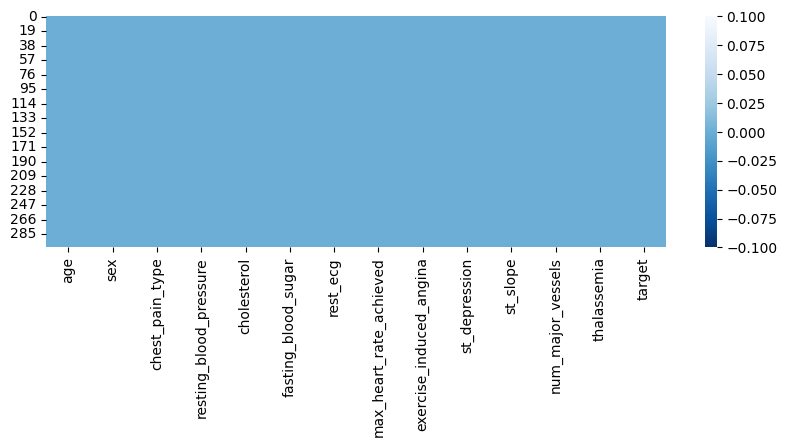

In [ ]:
print(df.isnull().sum())
plt.figure(figsize=(10,3))
sns.heatmap(df.isnull(), cbar=True, cmap='Blues_r');

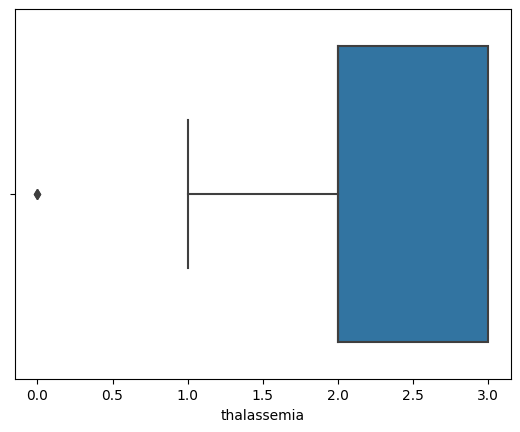

In [ ]:
sns.boxplot(x=df['thalassemia']);

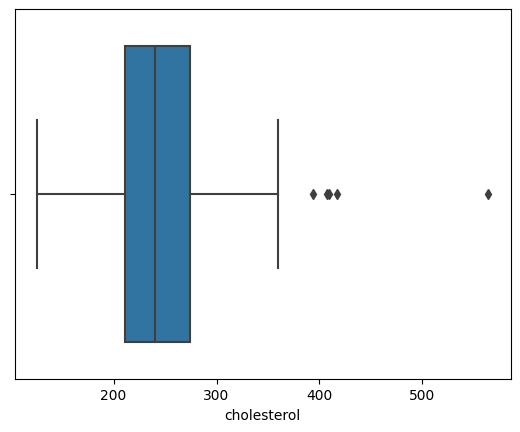

In [ ]:
sns.boxplot(x=df['cholesterol']);

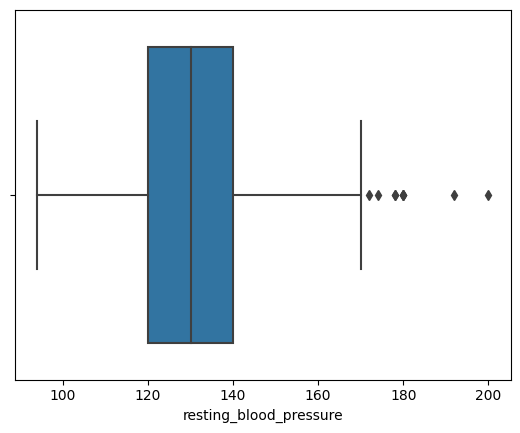

In [ ]:
sns.boxplot(x=df['resting_blood_pressure']);

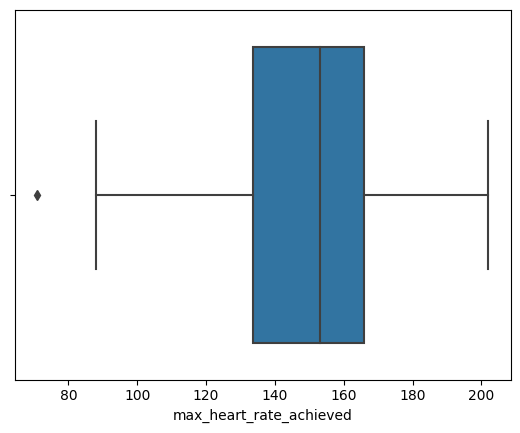

In [ ]:
sns.boxplot(x=df['max_heart_rate_achieved']);

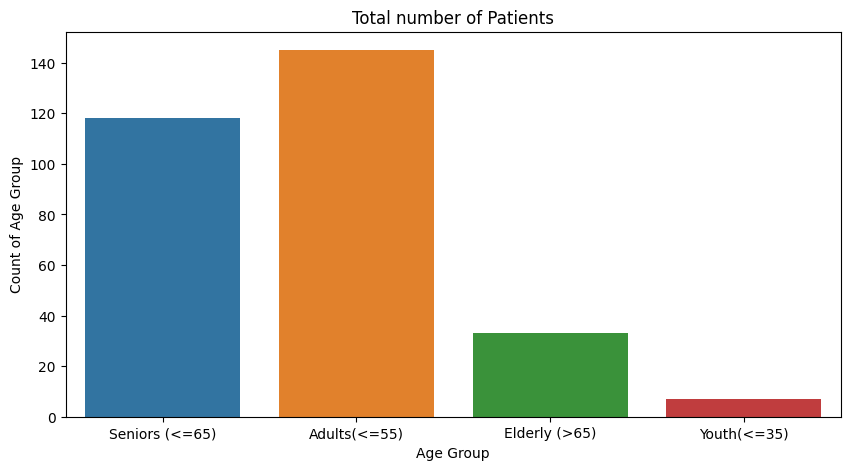

In [ ]:
# Age bracket
def age_bracket(age):
    if age<=35:
        return 'Youth(<=35)'
    elif age<=55:
        return 'Adults(<=55)'
    elif age<=65:
        return 'Seniors (<=65)'
    else:
        return 'Elderly (>65)'

df["age_bracket"]=df['age'].apply(age_bracket)

plt.figure(figsize=(10,5))
sns.countplot(x='age_bracket',data=df)
plt.xlabel('Age Group')
plt.ylabel('Count of Age Group')
plt.title('Total number of Patients');

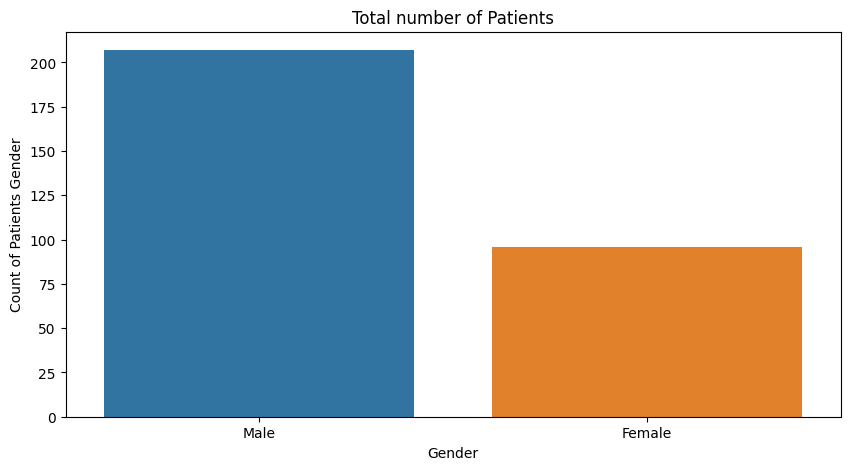

In [ ]:
def gender(sex):
    if sex==1:
        return 'Male'
    else:
        return 'Female'

df["Gender"]=df['sex'].apply(gender)

plt.figure(figsize=(10,5))
sns.countplot(x='Gender',data=df)
plt.xlabel('Gender')
plt.ylabel('Count of Patients Gender')
plt.title('Total number of Patients');

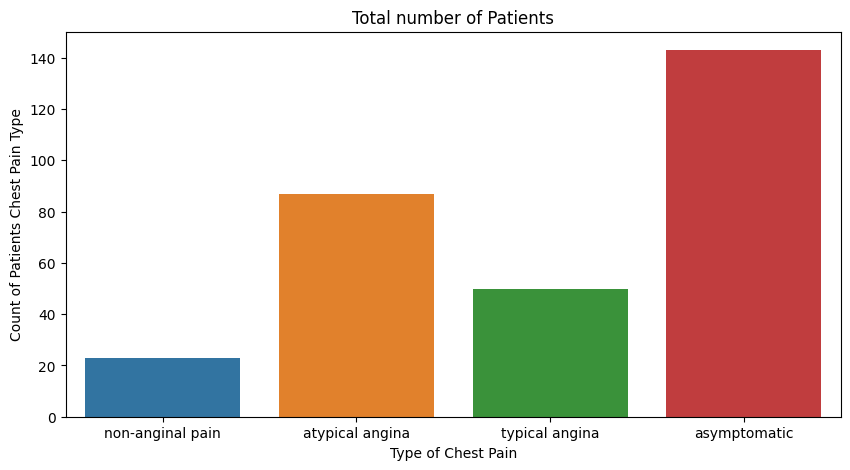

In [ ]:
def chest_pain(cp):
    if cp==1:
        return 'typical angina'
    elif cp==2:
        return 'atypical angina'
    elif cp==3:
        return 'non-anginal pain'
    else:
        return 'asymptomatic'

df["cp_cat"]=df['chest_pain_type'].apply(chest_pain)

plt.figure(figsize=(10,5))
sns.countplot(x='cp_cat',data=df)
plt.xlabel('Type of Chest Pain')
plt.ylabel('Count of Patients Chest Pain Type')
plt.title('Total number of Patients');

Yes    165
No     138
Name: label, dtype: int64


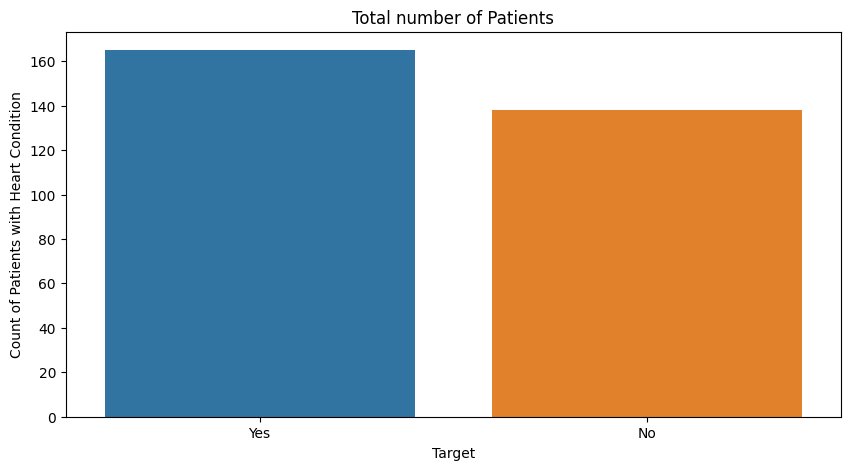

In [ ]:
def label(tg):
    if tg==1:
        return 'Yes'
    else:
        return 'No'

df["label"]=df['target'].apply(label)

print(df['label'].value_counts())

plt.figure(figsize=(10,5))
sns.countplot(x='label',data=df)
plt.xlabel('Target')
plt.ylabel('Count of Patients with Heart Condition')
plt.title('Total number of Patients');

Text(0.5, 1.0, 'Total number of Patients')

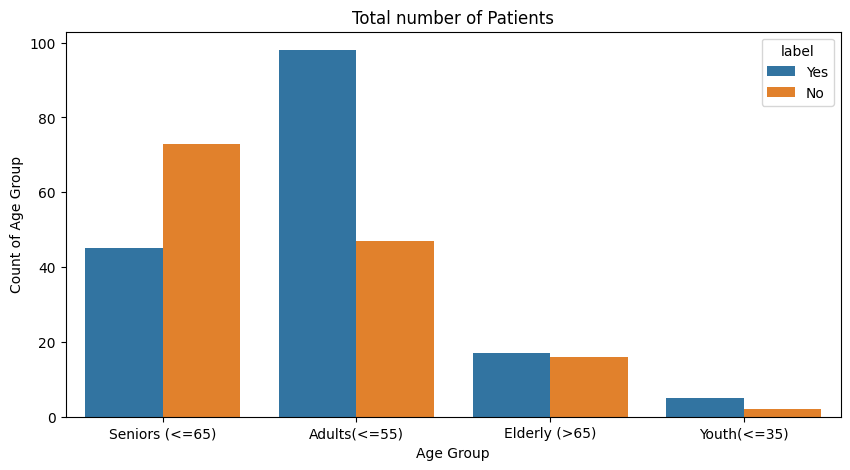

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='age_bracket', data=df, hue='label')
plt.xlabel('Age Group')
plt.ylabel('Count of Age Group')
plt.title('Total number of Patients')

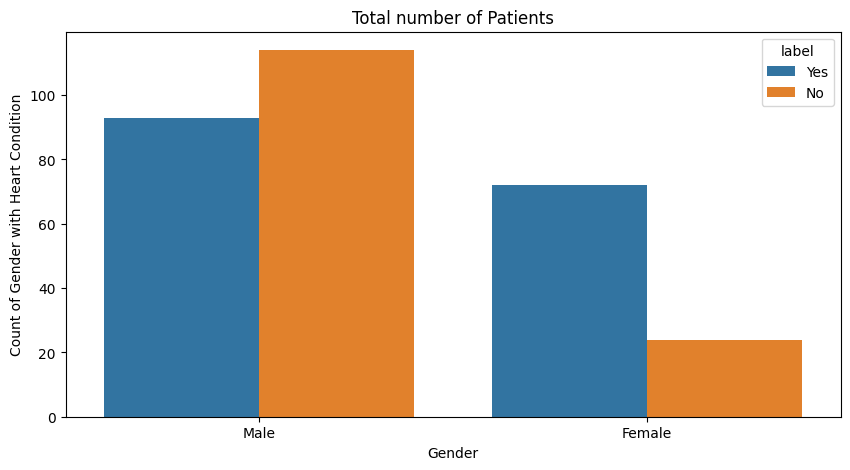

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Gender', data=df, hue='label')
plt.xlabel('Gender')
plt.ylabel('Count of Gender with Heart Condition')
plt.title('Total number of Patients');

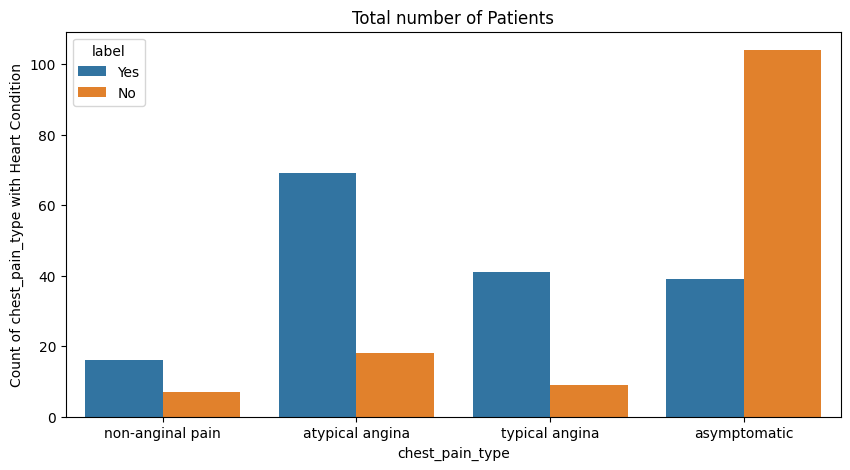

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='cp_cat', data=df, hue='label')
plt.xlabel('chest_pain_type')
plt.ylabel('Count of chest_pain_type with Heart Condition')
plt.title('Total number of Patients');

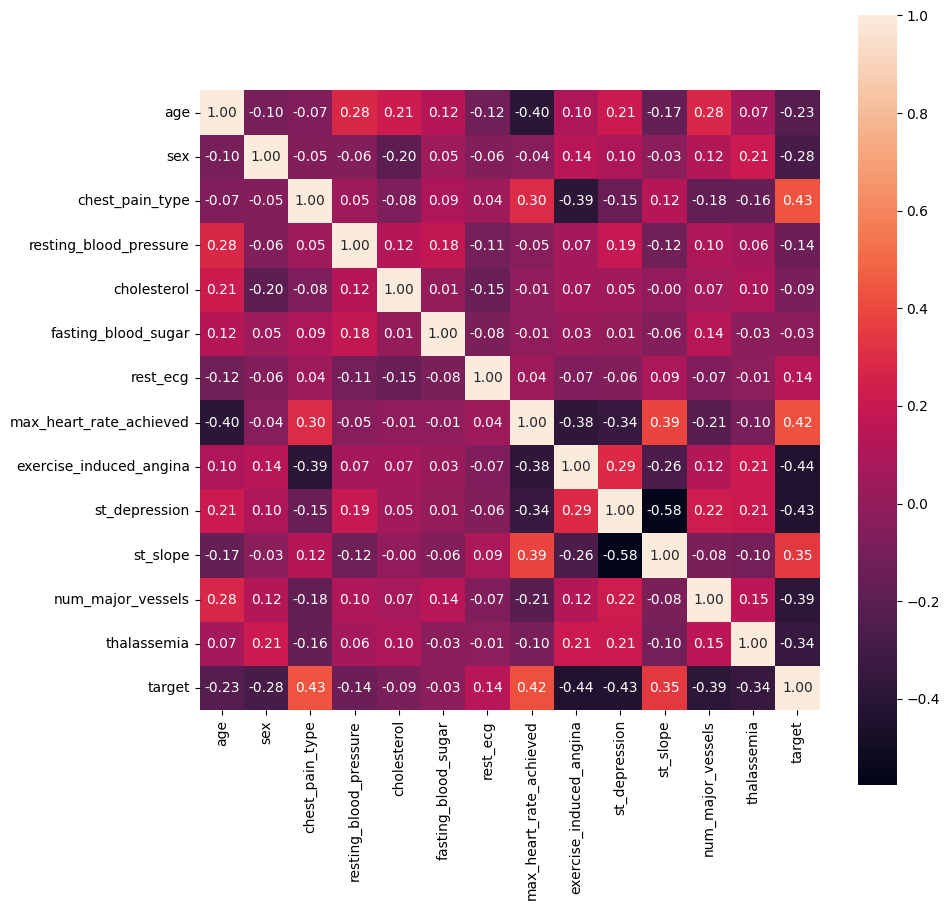

In [ ]:
plt.figure(figsize=(10,10))
hm=sns.heatmap(df.corr(), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})

In [ ]:
df1=df[['age','sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia']]

label=df[['target']]

In [ ]:
df1.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [ ]:
# Binary Classication
label.head()

,target
0,1
1,1
2,1
3,1
4,1


In [ ]:
# Normalization the columns with outier then drop them:
scaler=MinMaxScaler()
df1['scaled_RGP']=scaler.fit_transform(df1['resting_blood_pressure'].values.reshape(-1,1))
df1['scaled_Chol']=scaler.fit_transform(df1['cholesterol'].values.reshape(-1,1))
df1['scaled_Thal']=scaler.fit_transform(df1['thalassemia'].values.reshape(-1,1))
df1['scaled_max_heart_rate']=scaler.fit_transform(df1['max_heart_rate_achieved'].values.reshape(-1,1))

df1.drop(['resting_blood_pressure','cholesterol','max_heart_rate_achieved','thalassemia'], axis=1, inplace=True)
df1.head()

,age,sex,chest_pain_type,fasting_blood_sugar,rest_ecg,exercise_induced_angina,st_depression,st_slope,num_major_vessels,scaled_RGP,scaled_Chol,scaled_Thal,scaled_max_heart_rate
0,63,1,3,1,0,0,2.3,0,0,0.481132,0.244292,0.333333,0.603053
1,37,1,2,0,1,0,3.5,0,0,0.339623,0.283105,0.666667,0.885496
2,41,0,1,0,0,0,1.4,2,0,0.339623,0.178082,0.666667,0.770992
3,56,1,1,0,1,0,0.8,2,0,0.245283,0.251142,0.666667,0.816794
4,57,0,0,0,1,1,0.6,2,0,0.245283,0.520548,0.666667,0.702290


In [ ]:
# split the dataset into training and testing set- X=Qouestions, y=Answers
X_train, X_test, y_train, y_test=train_test_split(df1, label, test_size=0.2, random_state=42)

In [ ]:
# Model Building
# logistic regression

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

ly_pred = logreg.predict(X_test)

print('Logistic Regression')
print('Accuracy:',accuracy_score(y_test, ly_pred))
print('Precision:', precision_score(y_test, ly_pred))
print('Recall:', recall_score(y_test, ly_pred))
print('F1-score:', f1_score(y_test, ly_pred))
print('AUC-ROC:', roc_auc_score(y_test, ly_pred))

Logistic Regression
Accuracy: 0.8688524590163934
Precision: 0.875
Recall: 0.875
F1-score: 0.875
AUC-ROC: 0.8685344827586206


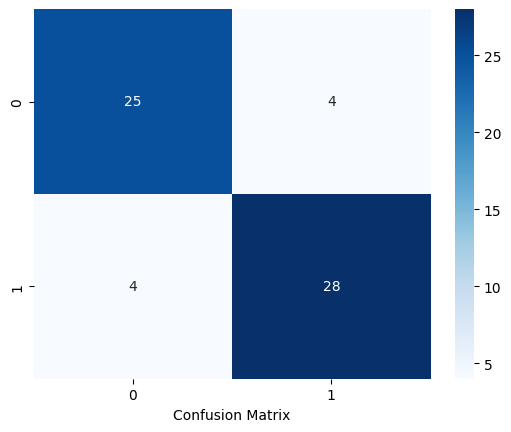

In [ ]:
# create a confusion matrix
lcm= confusion_matrix(y_test, ly_pred)

# visualize the confusion matrix
sns.heatmap(lcm, annot=True,cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.xlabel('Actual')
plt.xlabel('Confusion Matrix')
plt.show()

In [ ]:
# Model Building
# Random Forest Classifier

rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

rfy_pred = rfc.predict(X_test)

print('Random Forest Classifier')
print('Accuracy:',accuracy_score(y_test, ly_pred))
print('Precision:', precision_score(y_test, ly_pred))
print('Recall:', recall_score(y_test, ly_pred))
print('F1-score:', f1_score(y_test, ly_pred))
print('AUC-ROC:', roc_auc_score(y_test, ly_pred))

Random Forest Classifier
Accuracy: 0.8688524590163934
Precision: 0.875
Recall: 0.875
F1-score: 0.875
AUC-ROC: 0.8685344827586206


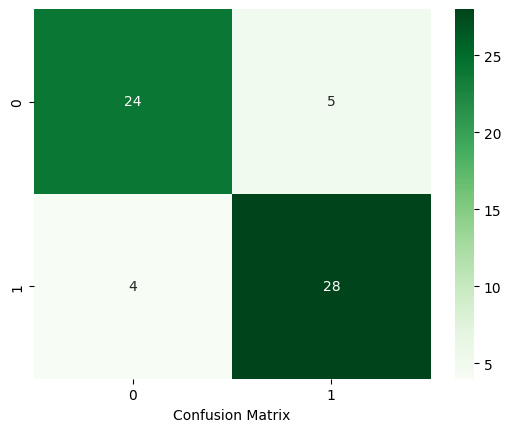

In [ ]:
# create a confusion matrix
rcm= confusion_matrix(y_test, rfy_pred)

# visualize the confusion matrix
sns.heatmap(rcm, annot=True,cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.xlabel('Actual')
plt.xlabel('Confusion Matrix')
plt.show()

In [ ]:
Classifiers = [[XGBClassifier(), 'XGB Classifier'],[RandomForestClassifier(), 'Random Forest'],
               [KNeighborsClassifier(),'K-Nearest Neighbors'],[SGDClassifier(),'SGD Classifier'],
               [SVC(), 'SVC'], [GaussianNB(),'Naive Bayes'],[DecisionTreeClassifier(random_state=42), 'Decision Tree'],
               [LogisticRegression(),'Logistic Regression']]

In [ ]:
acc_list={}
precision_list={}
recall_list={}
roc_list={}

for classifier in Classifiers:
    model= classifier[0]
    model.fit(X_train, y_train)
    model_name= classifier[1]

    pred= model.predict(X_test)

    a_score =accuracy_score(y_test, pred)
    p_score= precision_score(y_test, pred)
    r_score= recall_score(y_test, pred)
    roc_score= roc_auc_score(y_test, pred)

    acc_list[model_name]=([str(round(a_score*100, 2)) + '%'])
    precision_list[model_name]=([str(round(p_score*100, 2)) + '%'])
    recall_list[model_name]=([str(round(r_score*100, 2)) + '%'])
    roc_list[model_name]=([str(round(roc_score*100, 2)) + '%'])

    if model_name != classifier[-1][1]:
        print('')

In [ ]:
print('Accuracy Score')
s1=pd.DataFrame(acc_list)
s1.head()

Accuracy Score


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,83.61%,86.89%,75.41%,86.89%,65.57%,86.89%,85.25%,86.89%


In [ ]:
print('Precision')
s2=pd.DataFrame(precision_list)
s2.head()

Precision


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,86.67%,85.29%,79.31%,85.29%,65.71%,90.0%,92.59%,87.5%


In [ ]:
print('Recall')
s3=pd.DataFrame(recall_list)
s3.head()

Recall


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,81.25%,90.62%,71.88%,90.62%,71.88%,84.38%,78.12%,87.5%


In [ ]:
print('Roc Score')
s4=pd.DataFrame(roc_list)
s4.head()

Roc Score


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,83.73%,86.69%,75.59%,86.69%,65.25%,87.02%,85.61%,86.85%


In [ ]:
Report = pd.concat([s1,s2,s3,s4],
                   ignore_index=True,
                   sort=False)


In [ ]:
metrics_report = pd.DataFrame(Report)

In [ ]:
list = ['Accuracy Score','Precision','Recall','Roc Score']

n_series= pd.Series(list)

metrics_report['metrics'] = n_series

metrics_report

,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression,metrics
0,83.61%,86.89%,75.41%,86.89%,65.57%,86.89%,85.25%,86.89%,Accuracy Score
1,86.67%,85.29%,79.31%,85.29%,65.71%,90.0%,92.59%,87.5%,Precision
2,81.25%,90.62%,71.88%,90.62%,71.88%,84.38%,78.12%,87.5%,Recall
3,83.73%,86.69%,75.59%,86.69%,65.25%,87.02%,85.61%,86.85%,Roc Score


In [ ]:
metrics_report.set_index('metrics', inplace=True)
metrics_report

,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
metrics,,,,,,,,
Accuracy Score,83.61%,86.89%,75.41%,86.89%,65.57%,86.89%,85.25%,86.89%
Precision,86.67%,85.29%,79.31%,85.29%,65.71%,90.0%,92.59%,87.5%
Recall,81.25%,90.62%,71.88%,90.62%,71.88%,84.38%,78.12%,87.5%
Roc Score,83.73%,86.69%,75.59%,86.69%,65.25%,87.02%,85.61%,86.85%


Based on the provided metrics for different classifiers used for predicting possible heart disease in patients, we can make the following observations:

1. Accuracy Score: This metric represents the overall accuracy of the classifier in predicting the presence or absence of heart disease. The highest accuracy scores are observed for Random Forest, SGD Classifier, and Logistic Regression, all with an accuracy of 86.89%.

2. Precision: Precision reflects the proportion of correctly predicted positive instances (heart disease) out of all instances predicted as positive. The highest precision is seen in Naive Bayes (90.0%), followed by Logistic Regression (92.59%).

3. Recall: Recall (also known as sensitivity or true positive rate) indicates the proportion of actual positive instances correctly predicted by the classifier. The highest recall is observed in K-Nearest Neighbors and Naive Bayes at 90.62%.

4. ROC (Receiver Operating Characteristic) Score: ROC score is a widely used measure to evaluate classifier performance. It takes into account both the true positive rate and the false positive rate. Random Forest shows the highest ROC score at 86.69%.

From these metrics, we can conclude that Random Forest, SGD Classifier, and Logistic Regression perform consistently well across multiple evaluation measures. Additionally, Naive Bayes shows high accuracy, precision, and recall, making it another viable choice. Ultimately, the choice of which classifier to use might depend on factors such as interpretability, computational efficiency, and specific requirements of the problem at hand.